In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# import scraped NBA stats from Excel file

xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

# Small Forward Predictions

In the cell below, we take a look at a random year's data to get a sense of the relationship between each player's stats. In this sample, we focus on players who play Small Forward. 

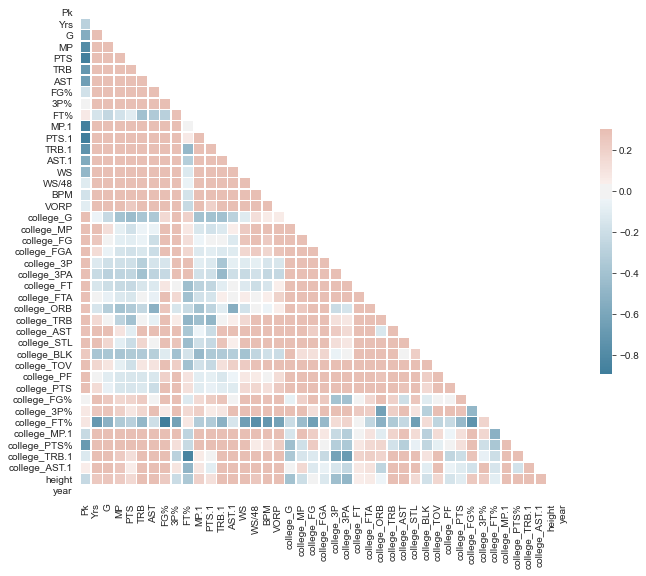

In [6]:
sample_year = map['draft_data_2014']
# remove entries with missing data
sample_year = sample_year.dropna()
sample_year_position = sample_year.loc[sample_year['position'] == 'Small']

# compute the correlation matrix
corr = sample_year_position.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# format diverging colour palette for correlation matrix
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix above, we can see that player college stats and performance variables have little to no correlation with their pick/ rank. 

College stats are variables with the "college" prefix. If we look in the first column, we can see the correlation of those variables with NBA draft pick (Pk). As the lighter shades indicate, there seems to be no relationship between their college stats and pick number. This is surprising as we hypothesized that players who performed better in their careers leading up to the draft would be better players, consequently being of higher "value". 

Another deduction we can make from the data is that players who were top ranked (lower Pk value) have improved significantly in their careers post-draft. Top picks are also more likely to stay in the NBA longer (Yrs vs Pk). This is shown by the relatively stronger correlation between the pick/ rank and their current career stats (blue squares at the top of the first column). 

In [4]:
frames = []

# looping through each dataframe item in map, and only acquiring the rows for players who play Small Forward
for key, value in map.items():
    test = value.loc[value['position'] == 'Small']
    test.reset_index(drop=True,inplace=True)
    test.index = test.index + 1
    test.Pk = test.index
    # drop any rows that are missing data
    test = test.dropna()

    frames.append(test)


# remove 2019 data to predict it
frames.pop()

/Users/vivianli/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,college_FT%,college_MP.1,college_PTS%,college_TRB.1,college_AST.1,height,weight,date_of_birth,place_of_birth,position
1,1,LAL,De'Andre Hunter,Virginia,1.0,63.0,2018.0,778.0,286.0,112.0,...,0.773,26.6,12.4,4.4,1.6,6.583333,225lb,"December 2, 1997",Pennsylvania,Small
2,2,ATL,Cam Reddish,Duke,1.0,58.0,1551.0,610.0,216.0,87.0,...,0.772,29.7,13.5,3.7,1.9,6.666667,218lb,"September 1, 1999",Pennsylvania,Small
3,3,SAS,Keldon Johnson,Kentucky,1.0,17.0,301.0,154.0,57.0,15.0,...,0.703,30.7,13.5,5.9,1.6,6.416667,220lb,"October 11, 1999",Virginia,Small
4,4,MIL,Kevin Porter,USC,1.0,50.0,1162.0,498.0,162.0,109.0,...,0.522,22.1,9.5,4.0,1.4,6.333333,203lb,"May 4, 2000",Washington,Small
5,5,CHO,Cody Martin,Nevada,1.0,48.0,903.0,238.0,158.0,95.0,...,0.689,28.9,9.7,4.6,3.6,6.416667,205lb,"September 28, 1995",North Carolina,Small
6,6,SAC,Justin James,Wyoming,1.0,36.0,232.0,89.0,32.0,18.0,...,0.731,28.1,15.7,5.4,2.6,6.583333,190lb,"January 24, 1997",Florida,Small
7,7,SAC,Ignas Brazdeikis,Michigan,1.0,9.0,53.0,17.0,5.0,4.0,...,0.773,29.6,14.8,5.4,0.8,6.500000,221lb,"January 8, 1999",Lithuania,Small
8,8,LAC,Terance Mann,Florida State,1.0,41.0,362.0,99.0,55.0,53.0,...,0.670,25.9,9.4,5.1,1.9,6.416667,215lb,"October 18, 1996",New York,Small
9,9,CHO,Jalen McDaniels,San Diego State,1.0,16.0,293.0,89.0,65.0,13.0,...,0.758,27.9,13.2,7.9,1.5,6.833333,205lb,"January 31, 1998",Washington,Small
10,10,GSW,Miye Oni,Yale,1.0,10.0,109.0,35.0,17.0,4.0,...,0.777,31.7,15.0,6.2,3.3,6.416667,206lb,"August 4, 1997",California,Small


In [5]:
import sklearn
from sklearn import linear_model
lreg = linear_model.LinearRegression()

In [6]:
loop_size = len(frames)
new_frame = []

# in the cell above we removed rows that had empty values; in some earlier years this meant the entire dataframe, as that specific stat was not being tracked yet
# here, we loop through the years and remove any empty dataframes 
for i in range(0,loop_size):
    if frames[i].empty is False:
        new_frame.append(frames[i])
        


In [7]:
# loop through the years to train the model with each year's data
for each in new_frame:

    X = each.loc[:,each.columns.str.startswith('college')]
    Y = each['Pk']

    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

In [8]:
# clean the 2019 data and prepare it for inputting into our model
f = map['draft_data_2019']
test_data = f.loc[f['position'] == 'Small']

test_data.reset_index(drop=True,inplace=True)
test_data.index = test_data.index + 1

test_data.Pk = test_data.index
test_data = test_data[['Player','Pk', 'college_G', 'college_MP', 'college_FG', 'college_FGA',
       'college_3P', 'college_3PA', 'college_FT', 'college_FTA', 'college_ORB',
       'college_TRB', 'college_AST', 'college_STL', 'college_BLK',
       'college_TOV', 'college_PF', 'college_PTS', 'college_FG%',
       'college_3P%', 'college_FT%', 'college_MP.1', 'college_PTS%',
       'college_TRB.1', 'college_AST.1']]
       
# create new dataframe to store predicted rankings
columns = ['Player','True Ranking','Predicted Ranking']
final_predictions = pd.DataFrame(columns = ['Player','True Ranking','Predicted Ranking'])
i = 0
for index, rows in test_data.iterrows(): 
        my_list =[rows[i] for i in range(2,25)] 
        final_predictions.loc[i] = [rows[0], rows[1], regr.predict([my_list])]
        i = i + 1
        
        
# reformat the predictions 
final_predictions['Predicted Ranking'] = final_predictions['Predicted Ranking'].rank(ascending=True).astype(int)


/Users/vivianli/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
final_predictions

,Player,True Ranking,Predicted Ranking
0,De'Andre Hunter,1,8
1,Cam Reddish,2,4
2,Keldon Johnson,3,5
3,Kevin Porter,4,2
4,Cody Martin,5,9
5,Justin James,6,10
6,Ignas Brazdeikis,7,6
7,Terance Mann,8,7
8,Jalen McDaniels,9,3
9,Miye Oni,10,1
